# **Data Science- Data Exploration**

### Welcome to the beginning of the heart disease data science project. In this project we will work through 5 notebooks to put some of the basic Pandas moves into practice, and start to think about how to go work through a unexplored dataset to derive insights. We will start from the very beginning, and then gradually move into building predtive models based on our data.


## **Import stuff**

In [ ]:
# Install and import all the neccessary stuff

%pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## **Load Data**

### First thing we will do is load the heart disease dataset (open source data). We made one change to it which was change the title of the last column from Heart_ stroke to Heart_stroke (just removed a space). Initially we just want to import it into a pandas dataframe and take a look at the first few rows using ```df.head()``` to get a look at what we have.

### We also want to run ```df.info``` to get some metadata to save us some time from counting rows and columns by hand. We will revisit this more later so don't get lost in the sauce now.

In [ ]:

# Import the dataset
df = pd.read_csv('heart_disease.csv')

# Display the first few rows of the dataset
df.head()

In [ ]:
# Get info about data types and missing values
df.info()

### So what are we looking for here? Well basically we are just trying to 'get to know' our data. We want to see 1. How much we have (4238 rows, 16 columns), 2. What types of data we have (a mix of categorical and numerical data) and 3. If we have any columns with null values (we do as evidenced by the non-null counts) being less thna the total number of entries in some cases.

### 'Getting to know' your data is an essential part of any project involving data, and it is always a good idea to spend some time just thinking about the structure of it as that will inform your downstream analyses!

### Now we want to get some basic statistics of our numerical data. To do this we can use ```df.describe()``` which will automaticall calculate some of the key things. Before we do this, let's briefly review the structure of dataframes as well as some of the statistical terms included in this command.

### Remember that a dataframe is essentially a fancy word for spreadsheet. We tend to structure our data with unique observations going down the rows, and different variables going across in columns. Therefore, when we are looking at the summary statistics it is relevant for us to calculate the measurements per column, so we can get a sense about the distribution of the data over all our observations

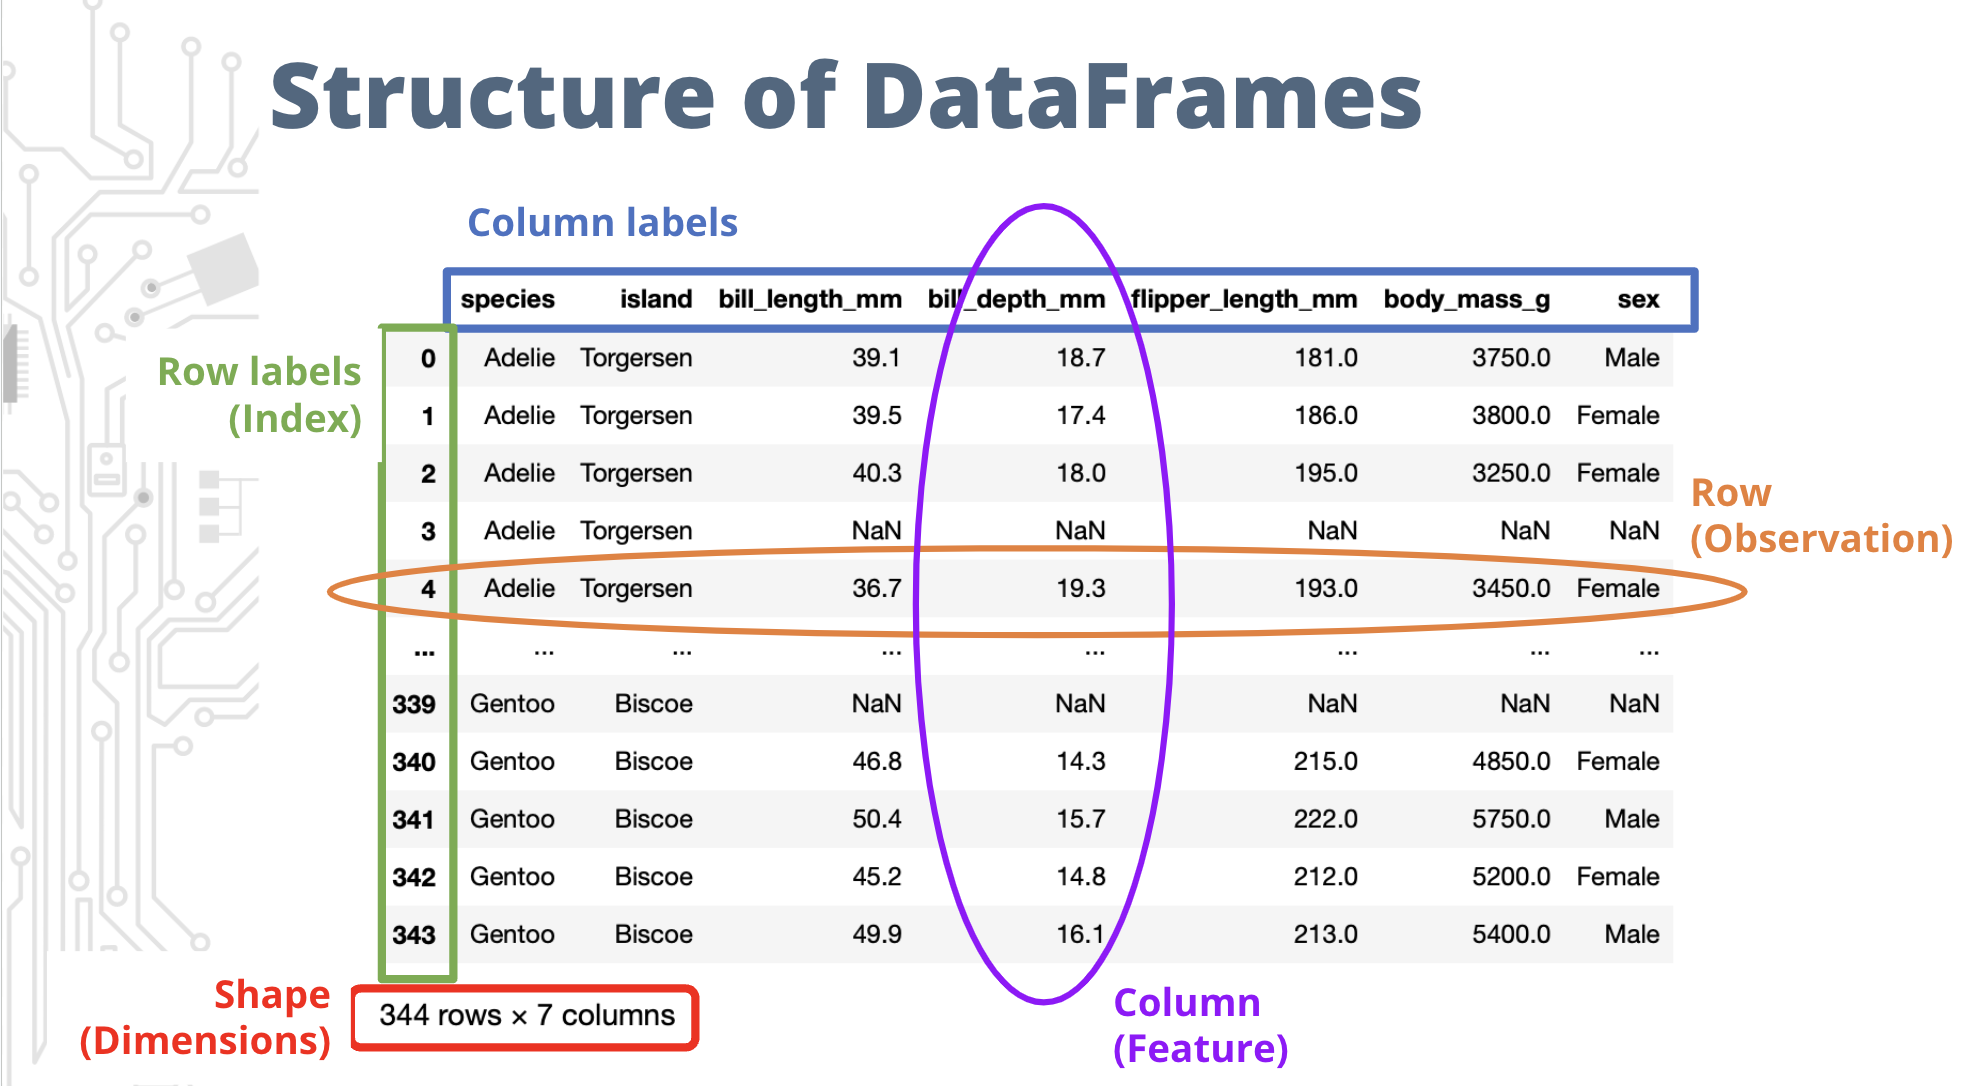

### In terms of summary statistics, ```df.describe()``` reports

1. ### Count: number of non null observations
2. ### Mean: average of the column
3. ### Standard deviation: square root of the variance
4. ### min, max, and interquartile range



In [ ]:
# Get basic summary statistics for numerical columns
df.describe()

### You can see how we can derive a lot of quick info at a glance from ```df.describe()```. We now know the age distribution of the patients in our dataset (32-70), the range of cholesterol levels in our patients (107-696, but based on the interquartile range it looks like the max is an outlier), and some data about BMI etc. Some of these metrics aren't particularly helpful (like the currentSmoker column, but we get it for free)

### To continue exploring our data (in the biz, this is called exploratory data analysis) lets dig into some more of our categorical data. First, it is worth mentioning the different types of data:

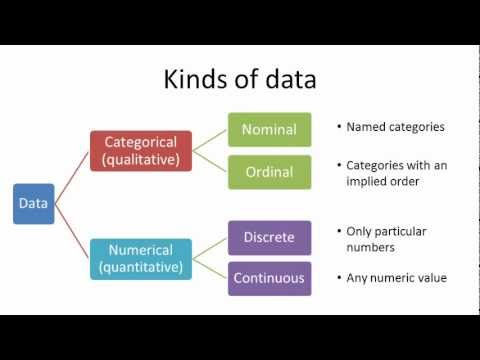 
###### Figure from Ian Bailey-Mortimer (https://www.youtube.com/watch?app=desktop&v=7bsNWq2A5gI)

### Categorical just means the type of data is qualittive, and, well, categorical in nature. Things like biological sex, smoker or not, whether or not you have diabetes, etc.

### Numerical data is data that is quantitative, and, well, numerical in nature. Things like how *many* cigarettes a person smokes, and the *level* of glucose. 

### Numerical data is often times best visualized with graphs, but pandas provides some nice ways to quickly look at categorical data (```df['label].value_counts()```) which can be easily understood from simple reading (although we will definitely do some plotting as well...)

In [ ]:
# For categorical columns like 'gender', 'education', 'current smoker' etc., 
# you can get a count of the unique values
print(df['Gender'].value_counts())
print(df['education'].value_counts())
print(df['currentSmoker'].value_counts())


### Pretty interesting! We see that our dataset is biased towards females, most people in our dataset are uneducated, and it is about a 50/50 split of smokers to not. Feel free to explore more of the categorical data on your own!

## **Null Values**

### Now we are moving into one of the more important concepts in data science, which is dealing with null (NaN) values. A null value is when an particular observation was not recorded in your data. This unfortunately happens all the time as real world data is very, very messy.

### You have many options for how to deal with null data. The one we employed here is perhaps the most basic, which is just getting rid of rows with a null data. You have to be careful with this as you can end up removing a large part of your data if it is messy, but in this case it works ok.

### Other tricks include filling in the null observations with an average of the column the data is in, filling null cells with 0, trying to predict what the null data would be (proceed with caution here...), and many more. Your choice will ultimately depend on your data as well as domain knowledge. Data science can sometimes be an art as well as a science!

In [ ]:
# Check for missing values
print(df.isnull().sum())
# lets remove rows with null values. Other ways to do this and data specific, but for this we will just get rid of them to keep things easy
print(df.shape)
# # Or drop rows with missing values
df.dropna(inplace=True)
print('drop missing rows')
print(df.shape)
# notice the size difference

### You can see that we lost about 600 rows of data after dropping the rows. It appears glucose was not measured for a lot of the patients, in addition to education level. As we still have ~3650 rows of data after dropping we will take this approach, but again, this is not a one size fits all approach!

## **Advanced Cleaning**

### Lets do a little more data cleaning now. Lets take another look at the types of data we have using ```df.info()``` as we did earlier

In [ ]:
df.info()

### We want to focus for a bit on the DType output here. We have a mix from int64 (integers)m to float64 (decimals) and objects (text or categories).

### This is all fine, but it would be judicious of us to tell our computer program *explicitly* the types of data we are using so we can standardize everything. We already discussed how some of our data is categorical in nature and some of it is numerical. 

### We will just make a a list of all of the categorical data we have and convert them to the datatype 'category'. This isn't necceasrily neccesary, but it is a good idea just to keep all of our ducks in a row so we know what we are working with. Be sure to check the ```df.info()``` output afterwards to make sure our changes were applued succesfully

In [ ]:
# First, we define a list of column names that we know are categorical in nature (yes/no, 1/0)
categorical_columns = ['Gender', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'Heart_stroke']

# Next, we're going to loop over this list of categorical column names. For each column in our dataframe that matches
# the column names in our list, we're going to change the data type of that column to 'category'. 
for column in categorical_columns:
    df[column] = df[column].astype('category')
    
df.info()

### Now lets just take care of some of the text data to make it easier to work with. There are lots of things that can and should be done to text data to make your data interpretable to the computer. The impetus for these kinds of operations can a lot of times be human error when inputting the data into the spreadhseet during data collection (spellings, capitilazation, trailing/ leading whitespaces, etc.).

### Here we just make a list of all of the columns that contain text information, and then iterate through this list to make all of the strings lowercase. The utility of this operation will be made immediately clear in the final data cleaning step.

In [ ]:
# Identify the columns in our dataframe that contain textual categorical data and standardize them. 
text_columns = ['Gender', 'education', 'prevalentStroke', 'Heart_stroke']

# Convert all the characters in a string to lowercase.
# We're doing this to ensure consistency in our data. For example, it ensures that 'Male', 'MALE', and 'male' 
# are all treated as the same value.
for column in text_columns: #Loop over this list of textual column names and make the changes
    df[column] = df[column].str.lower()

# Display the first few rows of the dataframe using the 'head()' function. This helps us verify that
# the changes have been made as expected.

df.head()


### The final data cleaning step we are going to do is just replace the text data of the categorical columns with numbers. It is generally easier to work with numbers whenever possible, and this will help us with some of the downstream visualization (try it without to see the errors pop up). 

### We do this using the built in `.map` function from pandas. We can have good confidence this mapping operation will work because we standardized the data earlier by making it all lowercase. This *will not* work if for some reason some of the 'yes' are capitalized or something else weird happened during data collection

In [ ]:
# Convert 'prevalentStroke' and 'Heart_ stroke' from 'yes'/'no' to 1/0
df['prevalentStroke'] = df['prevalentStroke'].map({'yes': 1, 'no': 0})
df['Heart_stroke'] = df['Heart_stroke'].map({'yes': 1, 'no': 0})
df['Gender'] = df['Gender'].map({'male': 0, 'female': 1})
df['education'] = df['education'].map({'uneducated': 0, 'primaryschool': 1, 'graduate':2, 'postgraduate':3})


# Display the first few rows of the dataframe using the 'head()' function. This helps us verify that
# the changes have been made as expected.

df.head()


## **Correlation Matrix**

### We have now spent a lot of time 'getting to know' and cleaning our data. It is worth explicitly stating that this is *never* time wasted. You will see from this point on that the visualizations and model buildings are all reasonably easy computationally, but unless you took the time to get your data clean and understand whats in it the visualizations and your models won't even be relevant.

### We will first be making a heatmap of the correlation coefficients of all of the data. The pearson correlation coefficient goes from -1 to 1 and and these extreme values represent a perfect negative or positive correlation respectively. Pandas gives you some very easy ways to do this automatically and easily.

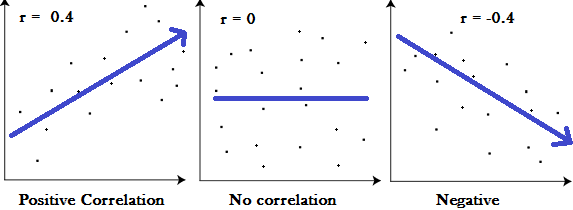

### There are some pythonic syntax things in the following cells. Don't get nervous by these! Anybody that codes will tell you they look stuff up all the time, and that is exactly what we did here. If you can create a vision in your head of what you want your plot to look like (**and understand the principles you are using**) you can google the right words to get the code to build your plot. We had to refer to numerous tools to get these plots looking like this, so don't think you have to memorize it all!

In [ ]:
corr = df.corr() # This line computes the correlation matrix of the DataFrame.
                 #  It calculates the Pearson correlation coefficient for each pair of numerical columns. 
                 # Post cleaning, all of our columns have some kind of numerical representation.

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool)) #  Here, create a mask for the upper triangle of your correlation matrix. 
                                               # This is done because the matrix is symmetric, i.e., the lower triangle is a mirror 
                                               # image of the upper triangle. Thus, showing both would be redundant.
                                               # You don't technially need to do this, but its a nice trick...

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask
# Look at the sns documenttion for details on all of the arguments. 
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Matrix Heatmap')
plt.show()


### Nice! This plot looks great, and it is very informative. We can take a look to see if there are any glaring correlations. # cigarettes per day seems to be negatively correlated with gender, and there seems to be a strong positive correlation between systolic and diastolic blood pressure (which makes sense). Careful analysis of this plot (and others) can be helpful when deciding which model to build later on.

##  **Pairplot**


### The pairplot is a visualization technique that allows us to explore the relationships between multiple variables in a dataset. It creates scatter plots for each pair of variables, showing the distribution of data points and any potential correlations between them.



### Both the pairplot and the correlation matrix are useful for understanding the relationships between variables in our dataset. However, they have some key differences:

1. ### Visualization: The pairplot provides a visual representation of the relationships, making it easier to identify patterns and trends. The correlation matrix, on the other hand, provides a **numerical representation** that can be useful for further analysis and modeling.

2. ### Scope: The pairplot focuses on pairwise relationships between variables, showing **scatter plots** for each pair. The correlation matrix, on the other hand, provides a comprehensive overview of the correlations between all pairs of variables in the dataset.

3. ### Interpretation: The pairplot allows us to visually inspect the relationships between variables, making it easier to identify potential nonlinear relationships or outliers. The correlation matrix provides a numerical measure of the strength and direction of the **linear relationships** between variables.


In [ ]:
# Create a subset of the dataframe. 
# We do this by passing a list of these column names to the dataframe df. 
subset = df[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]

# Now we're going to create a "pair plot" of this subset. Pair plots are a great way to visualize relationships 
# between different pairings of these variables. In a pair plot, the diagonal elements show the histogram of the 
# data for that particular variable, and the off-diagonal elements show scatter plots of one variable versus another
sns.pairplot(subset)

# lets take a look!
plt.show()


### Excellent. Remember, the pairplot and correlation matrix are showing us two very similar interpretations of the same data. We expected to see a pretty linear relatinoship between systolic and diastolic blood pressure, and when we look at the scatter plot we do see that. We also expected a linear correlation between gender and number of cigarettes, but we didn't plot that in the pair plot.

### Why? Because gender (in this context) is a binary 1 or 0 measure. As suchh, a correlation between gender and cigarettes smoked per day should not be expected to have a linear correlation, and this one of the reasons we use the pair plot (to search visually for these types of relationships in data). **It is important to keep the context of your data in mind when analysing it


### We got a bunch of useful information about our data from the prior visualizations, and this will really be the most helpful when trying to build models later on.

## **Other Plots**

### Lets now take a look at some other ways we can nicely and quickly plot data to see the relationships between our data. We will show box plots, violin plots, and bar plots. 

### Most of this is just to show the syntax for how to write the code for these plots, but it will nevertheless be helpful for us to contiunue our journey of 'getting to know' our data

In [ ]:
# Create a box plot to probe some of the specific data
# # A box plot is a graphical representation of statistical data based on a five-number summary.
# The minimum score, first (lower) quartile, median, third (upper) quartile, and maximum score.
# It helps in understanding our data distribution across different categories.

# In the boxplot function:
# 'x' parameter is set to 'Gender'. This is the categorical variable which splits data into groups.
# 'y' parameter is set to 'age'. This is the continuous variable whose distribution is being displayed.
# 'data' is set to our DataFrame, df. This is where the function is looking for the 'x' and 'y' inputs.
sns.boxplot(x='Gender', y='age', data=df)

# Set the title of the plot using plt.title. 
plt.title('Box Plot of Age by Gender')

# lets take a look!
plt.show()


In [ ]:
# Create a violin plot to probe some more of the data (A violin plot is a combination of a 
# box plot and a density plot.) It shows the distribution of quantitative data across several levels of 
# categorical variables such that those distributions can be compared.

# In the violinplot function:
# 'x' parameter is set to 'Heart_stroke'. This is the categorical variable which splits the data into groups.
# 'y' parameter is set to 'totChol'. This is the continuous variable whose distribution is being displayed.
# 'data' is set to our DataFrame, df. This is where the function is looking for the 'x' and 'y' inputs.

sns.violinplot(x='Heart_stroke', y='totChol', data=df)


# Add a title
plt.title('Violin Plot of Total Cholesterol by Heart Stroke')

# Show the plot
plt.show()


In [ ]:
# Create some bar graphs of the education column
education = df['education'].value_counts() # Get the counts for each unique value in the 'education' column 
                                           # Remember we mapped the text of education level to numbers early. If you wanted to display this
                                           # You could
education.plot(kind='bar') # Plot the counts in a bar graph
plt.title('Bar Graph for Education')  # Set the title of the graph
plt.xlabel('Education Level') # Set the label for the x-axis
plt.ylabel('Count') # Set the label for the y-axis


plt.show()

# Do the same for the hypertension column
hypertension = df['prevalentHyp'].value_counts() # Get the counts for each unique value in the 'prevalentHyp' column
hypertension.plot(kind='bar') # Plot the counts in a bar graph
plt.title('Bar Graph for Prevalence of Hypertension') # Set the title of the graph
plt.xlabel('Hypertension (0 = No, 1 = Yes)') # Set the label for the x-axis
plt.ylabel('Count') # Set the label for the y-axis
plt.show() # Display the plot


### And there we go. A lot of this can be gleaned from the pandas tools (such as `df['variable].value_counts`), but this how you would quickly graphically display them using a few different plots. Keep in mind you get different information from differnt plots (violin vs box, for example), so you will need to choose the best one to accomplish the message you want to convey!

## **Outro**

### This concludes the notebook on data exploration and how to begin getting to know your data. Now that we have gotten familiar with the dataset as well as some of the relationships that exist in it we can move to starting to do some statistical tests and hypothesis testing.